# **Importing Libraries and Dataset Information**

In [610]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
!pip install keras-tuner --upgrade
import keras_tuner as kt
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, roc_auc_score



The Synthetic Employee Attrition Dataset is a simulated dataset designed for the analysis and prediction of employee attrition. It contains detailed information about various aspects of an employee's profile, including demographics, job-related features, and personal circumstances.

The dataset comprises 74,498 samples, split into training and testing sets to facilitate model development and evaluation. Each record includes a unique Employee ID and features that influence employee attrition. The goal is to understand the factors contributing to attrition and develop predictive models to identify at-risk employees.

This dataset is ideal for HR analytics, machine learning model development, and demonstrating advanced data analysis techniques. It provides a comprehensive and realistic view of the factors affecting employee retention, making it a valuable resource for researchers and practitioners in the field of human resources and organizational development.

In [612]:
#Employee ID: A unique identifier assigned to each employee.
#Age: The age of the employee, ranging from 18 to 60 years.
#Gender: The gender of the employee
#Years at Company: The number of years the employee has been working at the company.
#Monthly Income: The monthly salary of the employee, in dollars.
#Job Role: The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.
#Work-Life Balance: The employee's perceived balance between work and personal life, (Poor, Below Average, Good, Excellent)
#Job Satisfaction: The employee's satisfaction with their job: (Very Low, Low, Medium, High)
#Performance Rating: The employee's performance rating: (Low, Below Average, Average, High)
#Number of Promotions: The total number of promotions the employee has received.
#Distance from Home: The distance between the employee's home and workplace, in miles.
#Education Level: The highest education level attained by the employee: (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD)
#Marital Status: The marital status of the employee: (Divorced, Married, Single)
#Job Level: The job level of the employee: (Entry, Mid, Senior)
#Company Size: The size of the company the employee works for: (Small,Medium,Large)
#Company Tenure: The total number of years the employee has been working in the industry.
#Remote Work: Whether the employee works remotely: (Yes or No)
#Leadership Opportunities: Whether the employee has leadership opportunities: (Yes or No)
#Innovation Opportunities: Whether the employee has opportunities for innovation: (Yes or No)
#Company Reputation: The employee's perception of the company's reputation: (Very Poor, Poor,Good, Excellent)
#Employee Recognition: The level of recognition the employee receives:(Very Low, Low, Medium, High)
#Attrition: Whether the employee has left the company, encoded as 0 (stayed) and 1 (Left).

# **Data Inspection and Initial Exploration**


In [614]:
df=pd.read_csv('train.csv')

In [615]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [617]:
df.shape
print("number of rows:",df.shape[0])
print("number of columns:",df.shape[1])

number of rows: 59598
number of columns: 24


# **Handling Missing Values and Dupplicated recored and Dropping the EmployeeID**

In [619]:
df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [620]:
df.duplicated().sum()

0

In [621]:
df.drop('Employee ID',axis=1,inplace=True)

# **Convert discrete small-value columns to 'category' to optimize memory usage and represent distinct levels**



In [623]:
df['Number of Dependents'].value_counts()

Number of Dependents
0    17848
1    15510
2     8862
3     8249
4     6066
5     2401
6      662
Name: count, dtype: int64

In [624]:
df['Number of Promotions'].value_counts()

Number of Promotions
0    29716
1    14965
2    10884
3     3245
4      788
Name: count, dtype: int64

In [625]:
df['Number of Dependents'] = df['Number of Dependents'].astype('category')
df['Number of Promotions'] = df['Number of Promotions'].astype('category')

In [626]:
df.info()
##from 10.9 to 9.7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       59598 non-null  int64   
 1   Gender                    59598 non-null  object  
 2   Years at Company          59598 non-null  int64   
 3   Job Role                  59598 non-null  object  
 4   Monthly Income            59598 non-null  int64   
 5   Work-Life Balance         59598 non-null  object  
 6   Job Satisfaction          59598 non-null  object  
 7   Performance Rating        59598 non-null  object  
 8   Number of Promotions      59598 non-null  category
 9   Overtime                  59598 non-null  object  
 10  Distance from Home        59598 non-null  int64   
 11  Education Level           59598 non-null  object  
 12  Marital Status            59598 non-null  object  
 13  Number of Dependents      59598 non-null  cate

# **Outlier Detection and Treatment**

In [628]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object','category']).columns

In [629]:
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['Age', 'Years at Company', 'Monthly Income', 'Distance from Home',
       'Company Tenure'],
      dtype='object')
Categorical Columns: Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')


C:\Users\Owner\AppData\Local\Temp\ipykernel_34644\2617024950.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i],palette=palette)
C:\Users\Owner\AppData\Local\Temp\ipykernel_34644\2617024950.py:14: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(y=df[col], ax=axes[i],palette=palette)
C:\Users\Owner\AppData\Local\Temp\ipykernel_34644\2617024950.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i],palette=palette)
C:\Users\Owner\AppData\Local\Temp\ipykernel_34644\2617024950.py:14: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(y

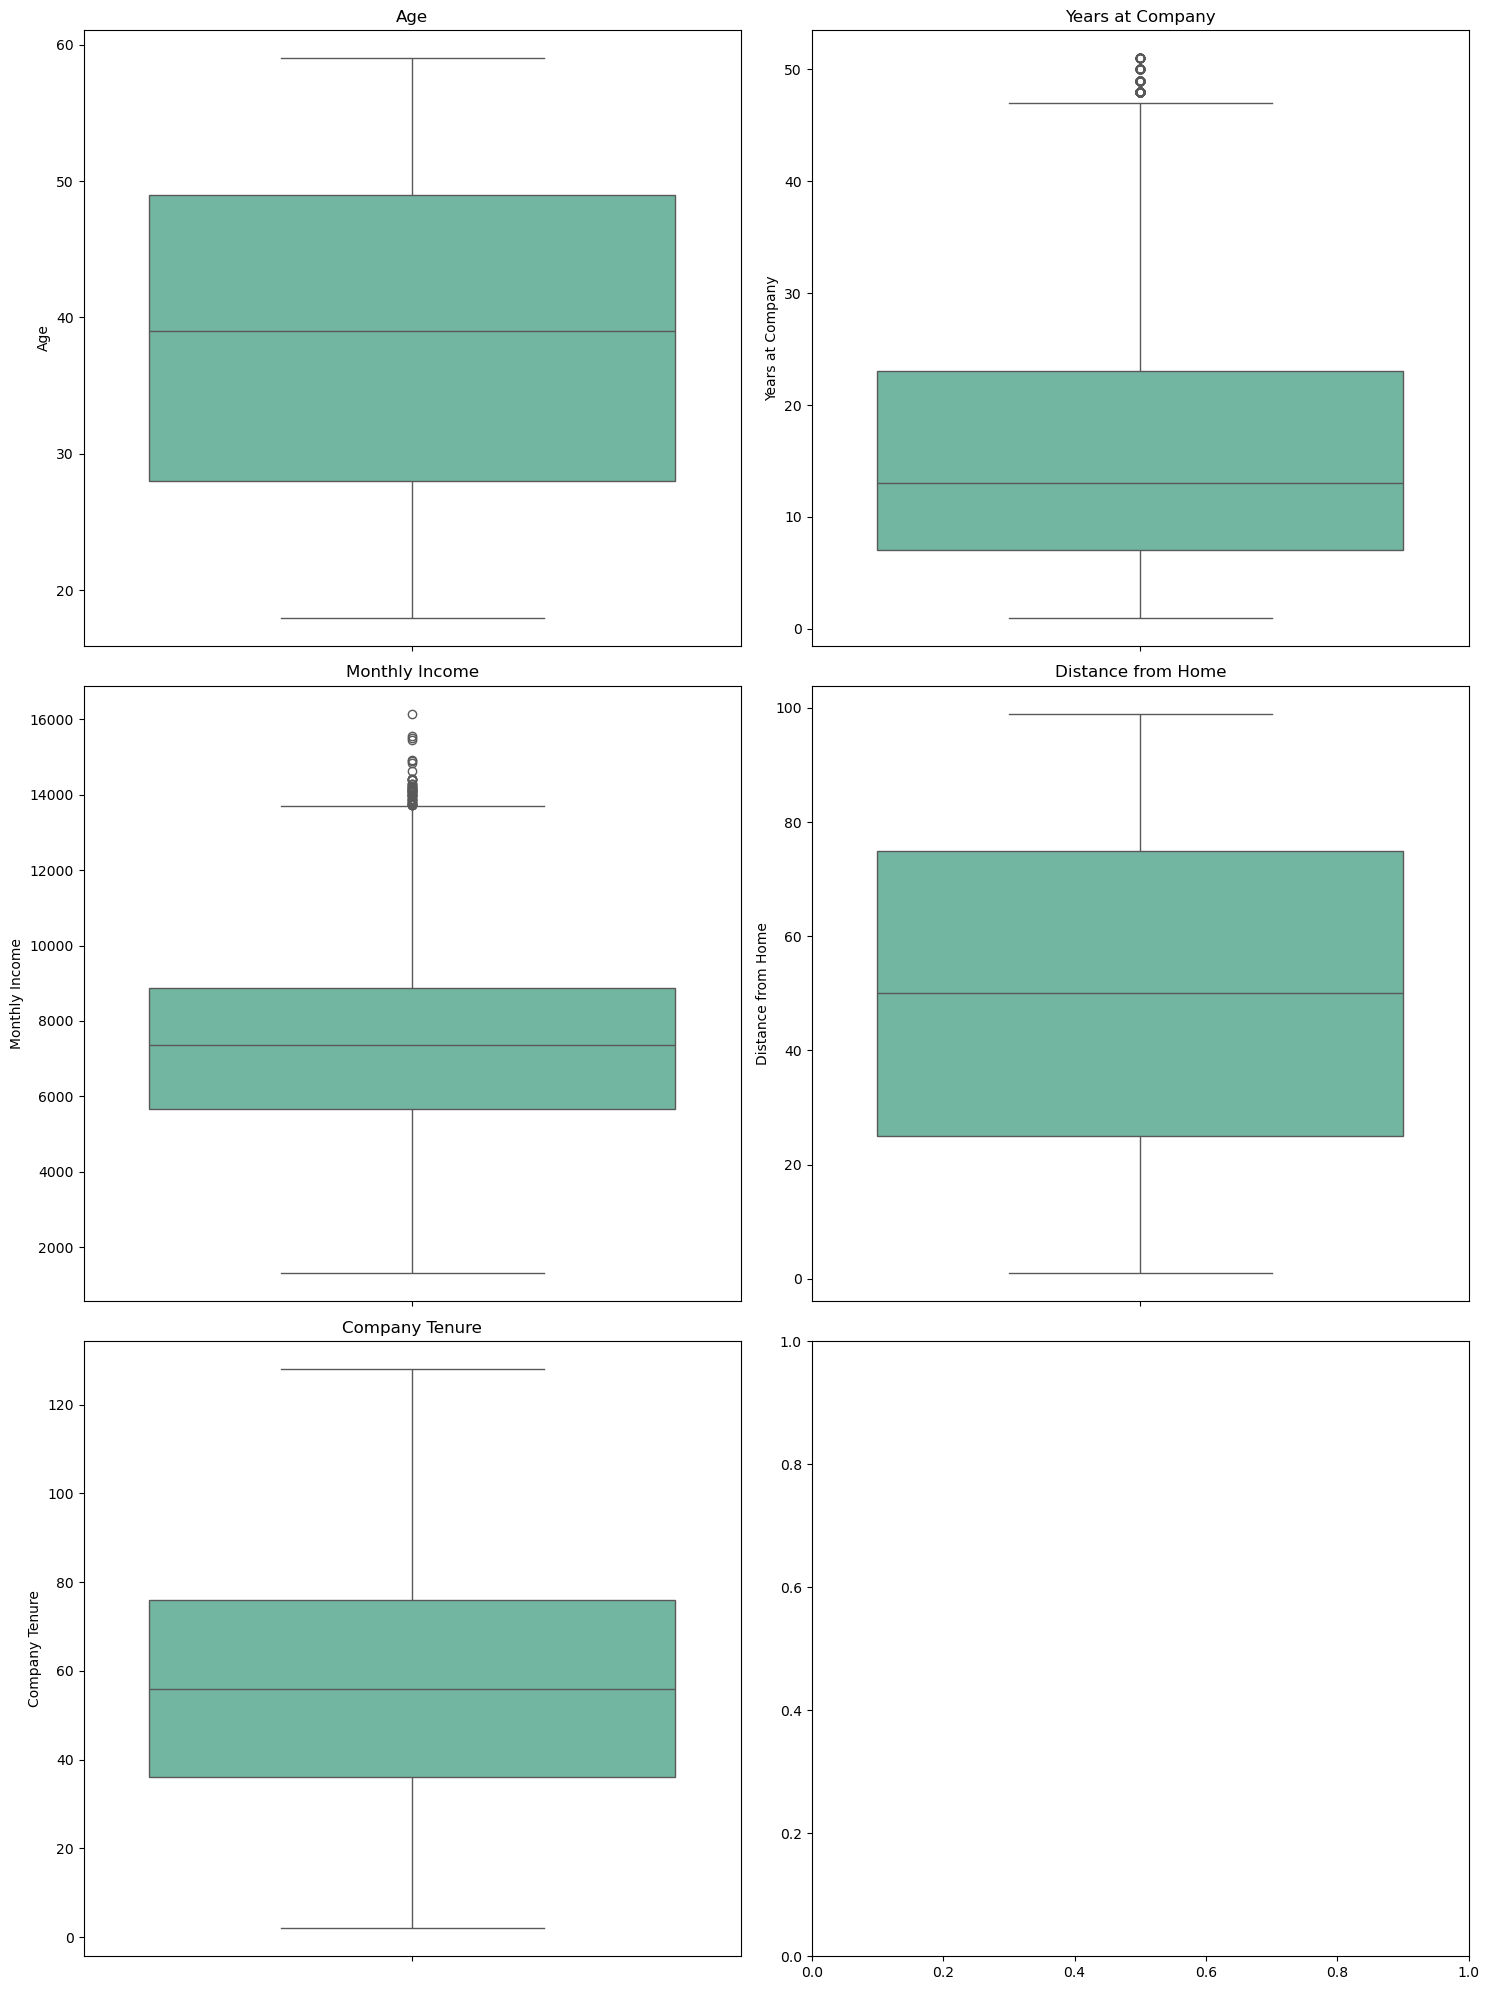

In [630]:
# Determine the number of numerical columns
num_columns = len(numerical_columns)

# Calculate the number of rows needed (using integer division and ceiling if necessary)
rows = (num_columns // 2) + (num_columns % 2)

# Create the subplots with enough axes
fig, axes = plt.subplots(rows, 2, figsize=(15, 20))  # Adjust the 2 if you'd like more columns per row
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Set the color palette
palette = sns.color_palette("Set2")
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i],palette=palette)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()
##seems like we have 2 outliers in Years at company &&Monthlyincome

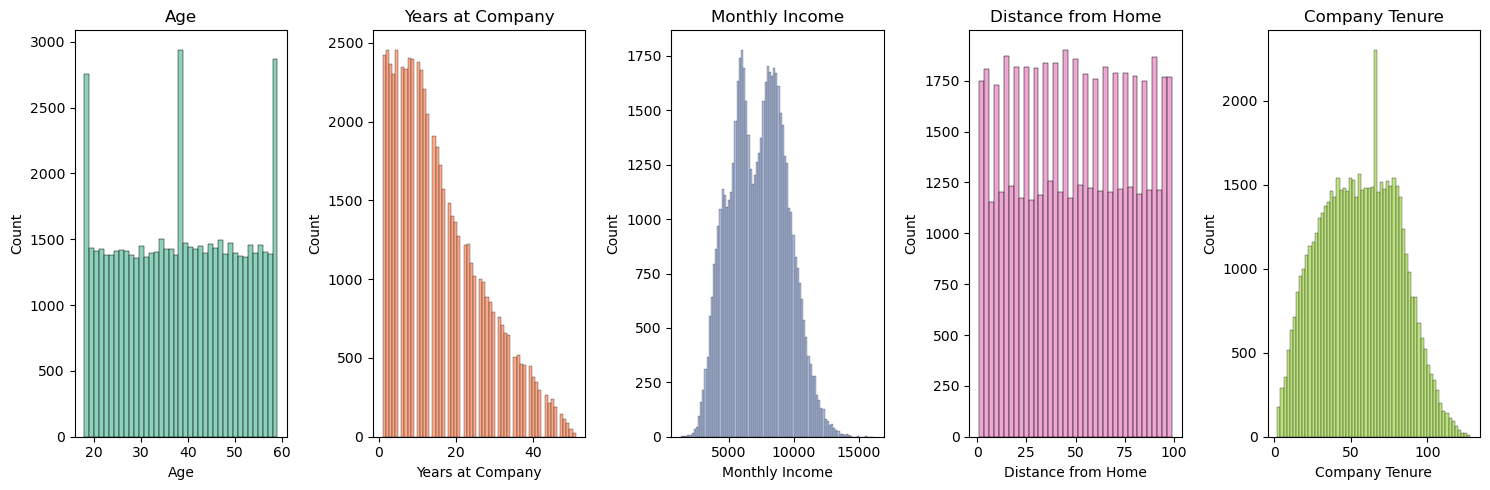

In [631]:
palette = sns.color_palette("Set2", len(numerical_columns))  # Choose any palette like 'Set1', 'coolwarm', etc.
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(15, 5))

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], ax=axes[i], color=palette[i])  # Use the color palette for each histogram
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

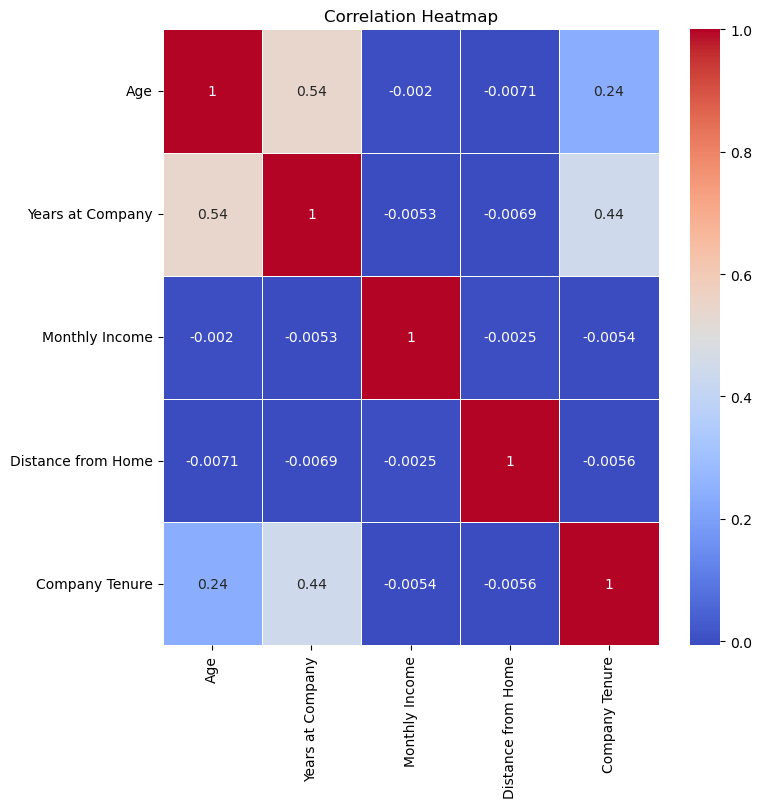

In [632]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because n

<Figure size 800x800 with 0 Axes>

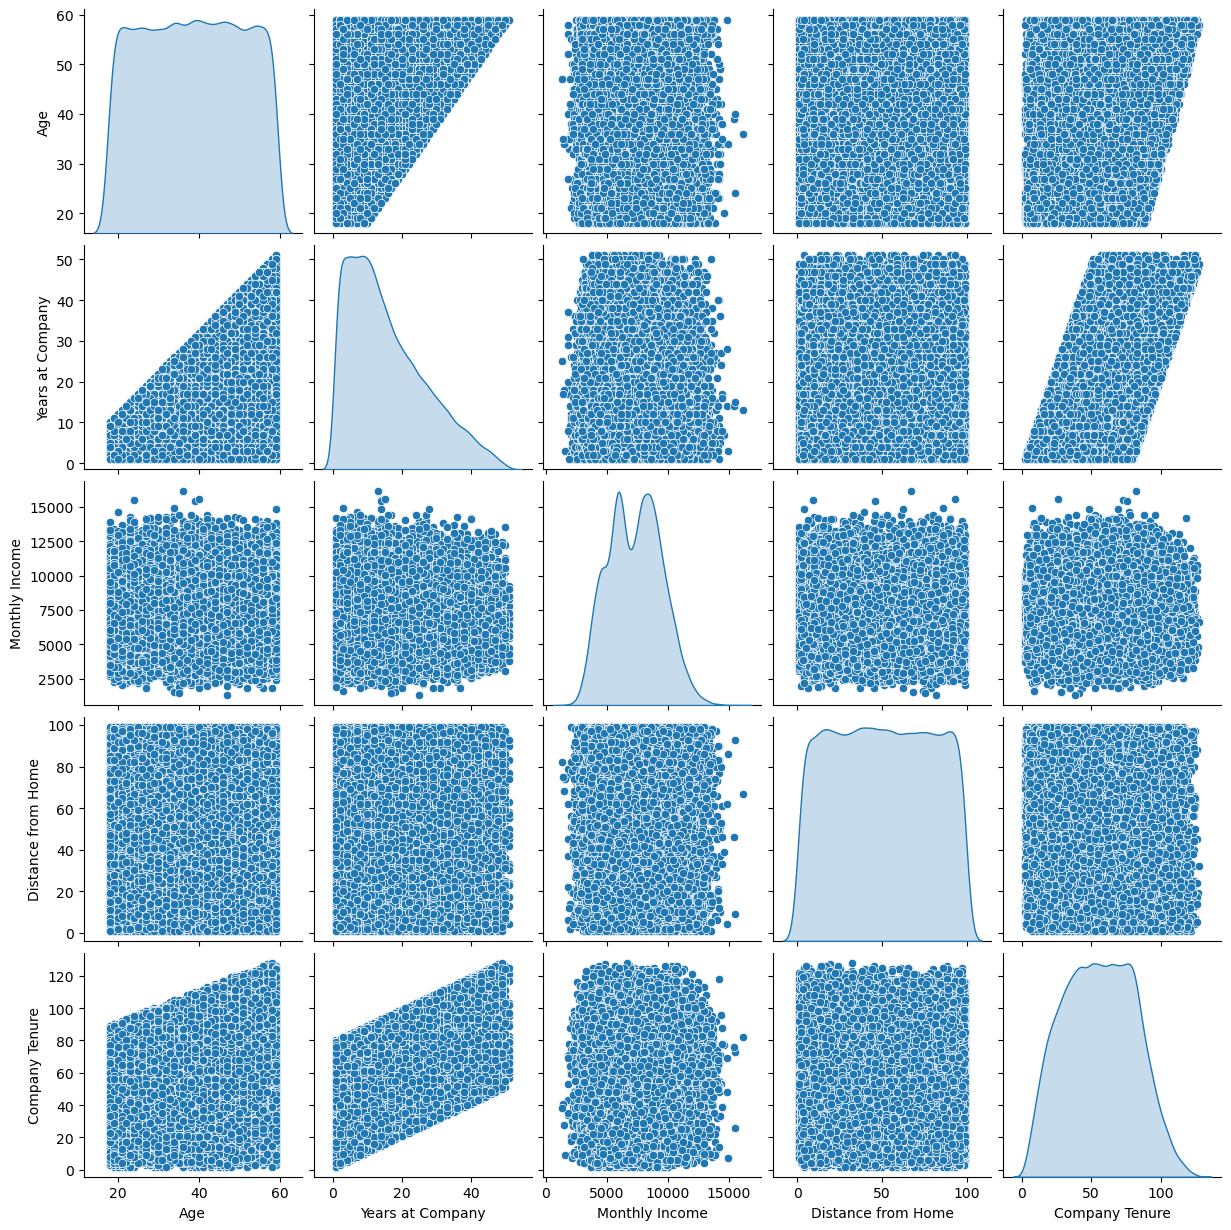

In [633]:
plt.figure(figsize=(8, 8))
sns.pairplot(df[numerical_columns],diag_kind='kde', palette='coolwarm')
plt.show()

In [634]:
for col in numerical_columns:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  outliers=df[(df[col]<lower_bound) | (df[col]>upper_bound)]
  print(f"Column: {col}")
  print(f"Number of lower outliers: {outliers[outliers[col] < lower_bound].shape[0]}")
  print(f"Number of upper outliers: {outliers[outliers[col] > upper_bound].shape[0]}")
  num_outliers = outliers.shape[0] / df.shape[0]
  print(f"Proportion of outliers in {col}: {round(num_outliers, 3)}")
  print("*********************************************************")

Column: Age
Number of lower outliers: 0
Number of upper outliers: 0
Proportion of outliers in Age: 0.0
*********************************************************
Column: Years at Company
Number of lower outliers: 0
Number of upper outliers: 273
Proportion of outliers in Years at Company: 0.005
*********************************************************
Column: Monthly Income
Number of lower outliers: 0
Number of upper outliers: 50
Proportion of outliers in Monthly Income: 0.001
*********************************************************
Column: Distance from Home
Number of lower outliers: 0
Number of upper outliers: 0
Proportion of outliers in Distance from Home: 0.0
*********************************************************
Column: Company Tenure
Number of lower outliers: 0
Number of upper outliers: 0
Proportion of outliers in Company Tenure: 0.0
*********************************************************


In [635]:
### The number of outliers is very small, so I will keep them in the dataset.


# **Checking Data Consistency and Visualizing Categorical Distributions**

C:\Users\Owner\AppData\Local\Temp\ipykernel_34644\348351937.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Paired', ax=axes[i])
C:\Users\Owner\AppData\Local\Temp\ipykernel_34644\348351937.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Paired', ax=axes[i])
C:\Users\Owner\AppData\Local\Temp\ipykernel_34644\348351937.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Paired', ax=axes[i])
C:\Users\Owner\AppD

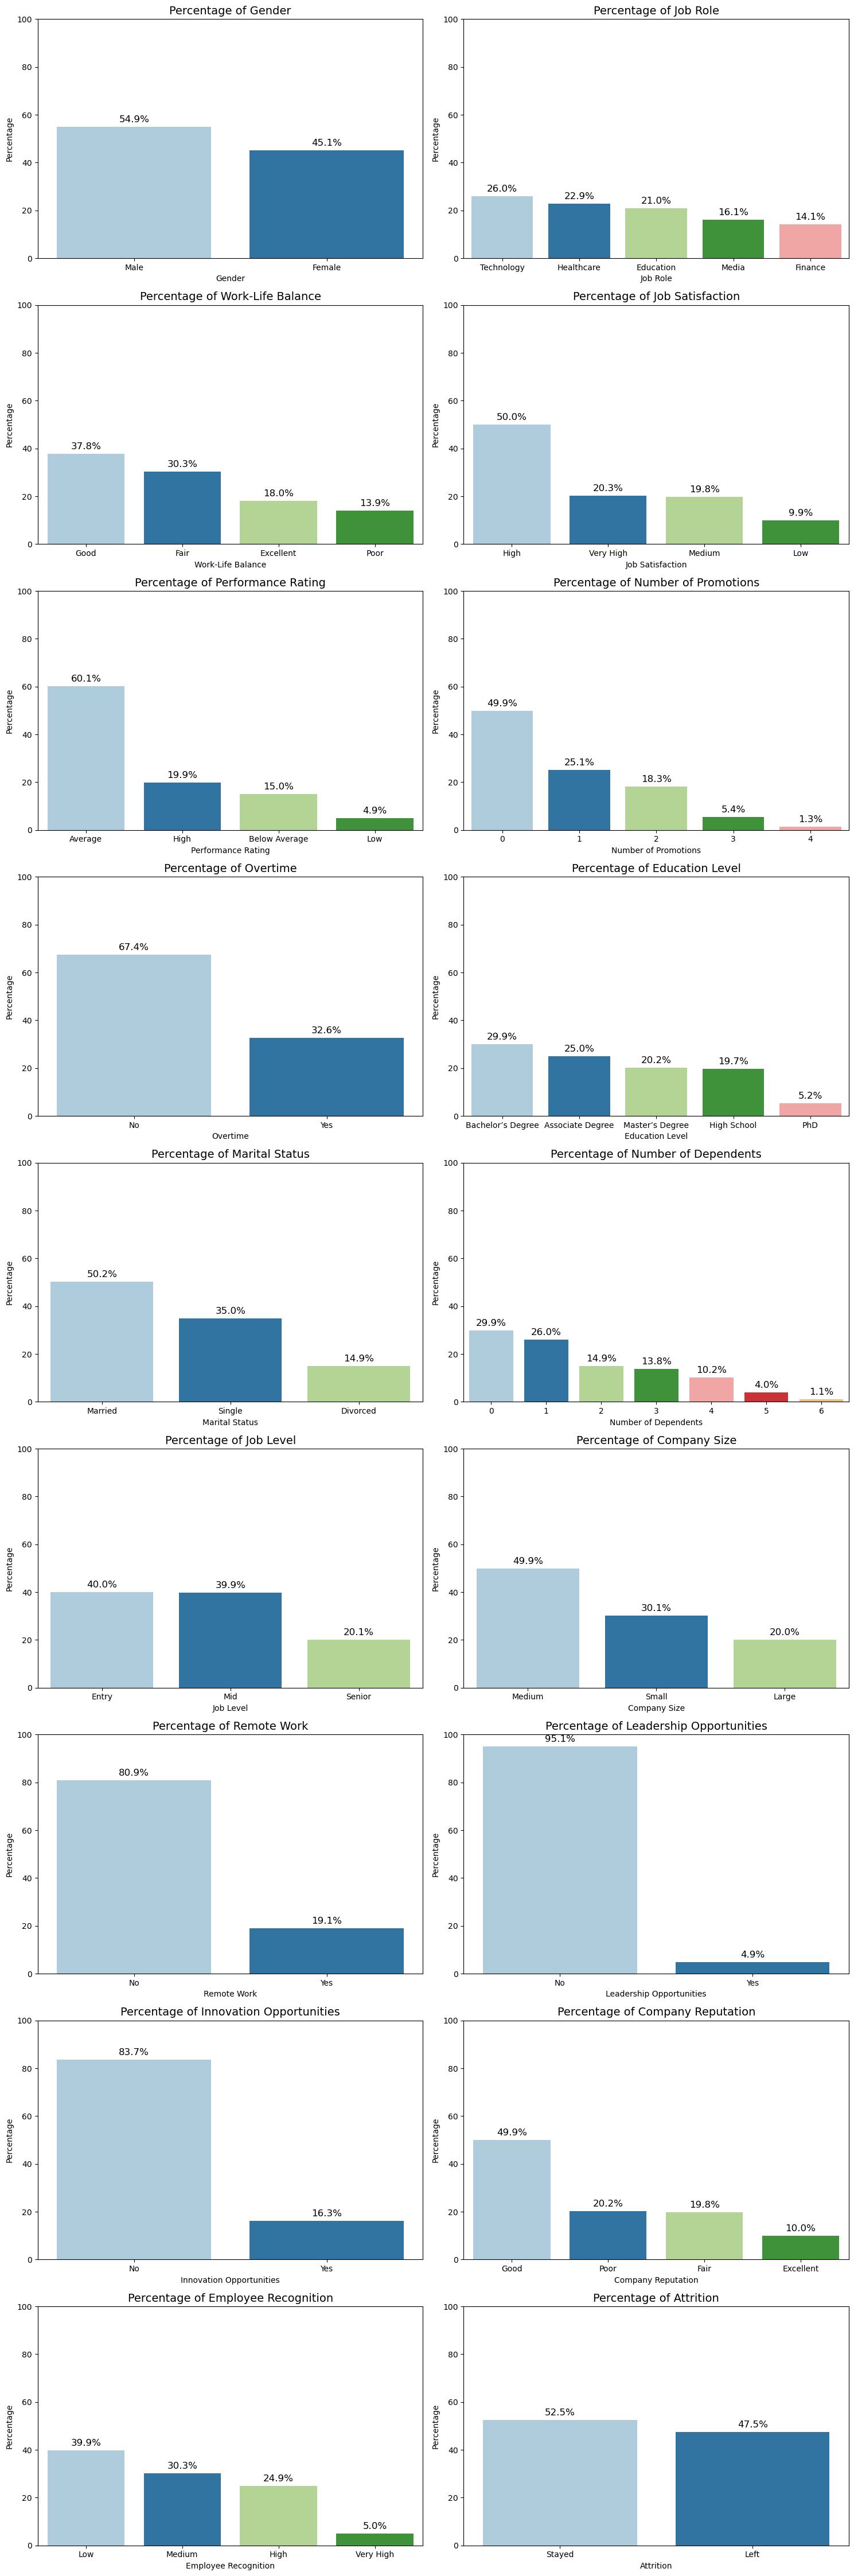

In [637]:
num_cols = 2
num_rows = (len(categorical_columns) + 1) // num_cols  # Add 1 to handle odd number of plots

# Define the figure size based on the number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easy iteration

# Loop through each categorical column and create a bar plot with percentages
for i, col in enumerate(categorical_columns):
    counts = df[col].value_counts(normalize=True) * 100

    # Create a bar plot for the percentage
    sns.barplot(x=counts.index, y=counts.values, palette='Paired', ax=axes[i])
    axes[i].set_title(f'Percentage of {col}', fontsize=14)
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlabel(col)
    axes[i].set_ylim(0, 100)  # Set y-axis limit to 100 for percentages

    # Display percentages on top of bars
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.1f}%',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=12, color='black',
                         xytext=(0, 9), textcoords='offset points')

plt.tight_layout()
plt.show()


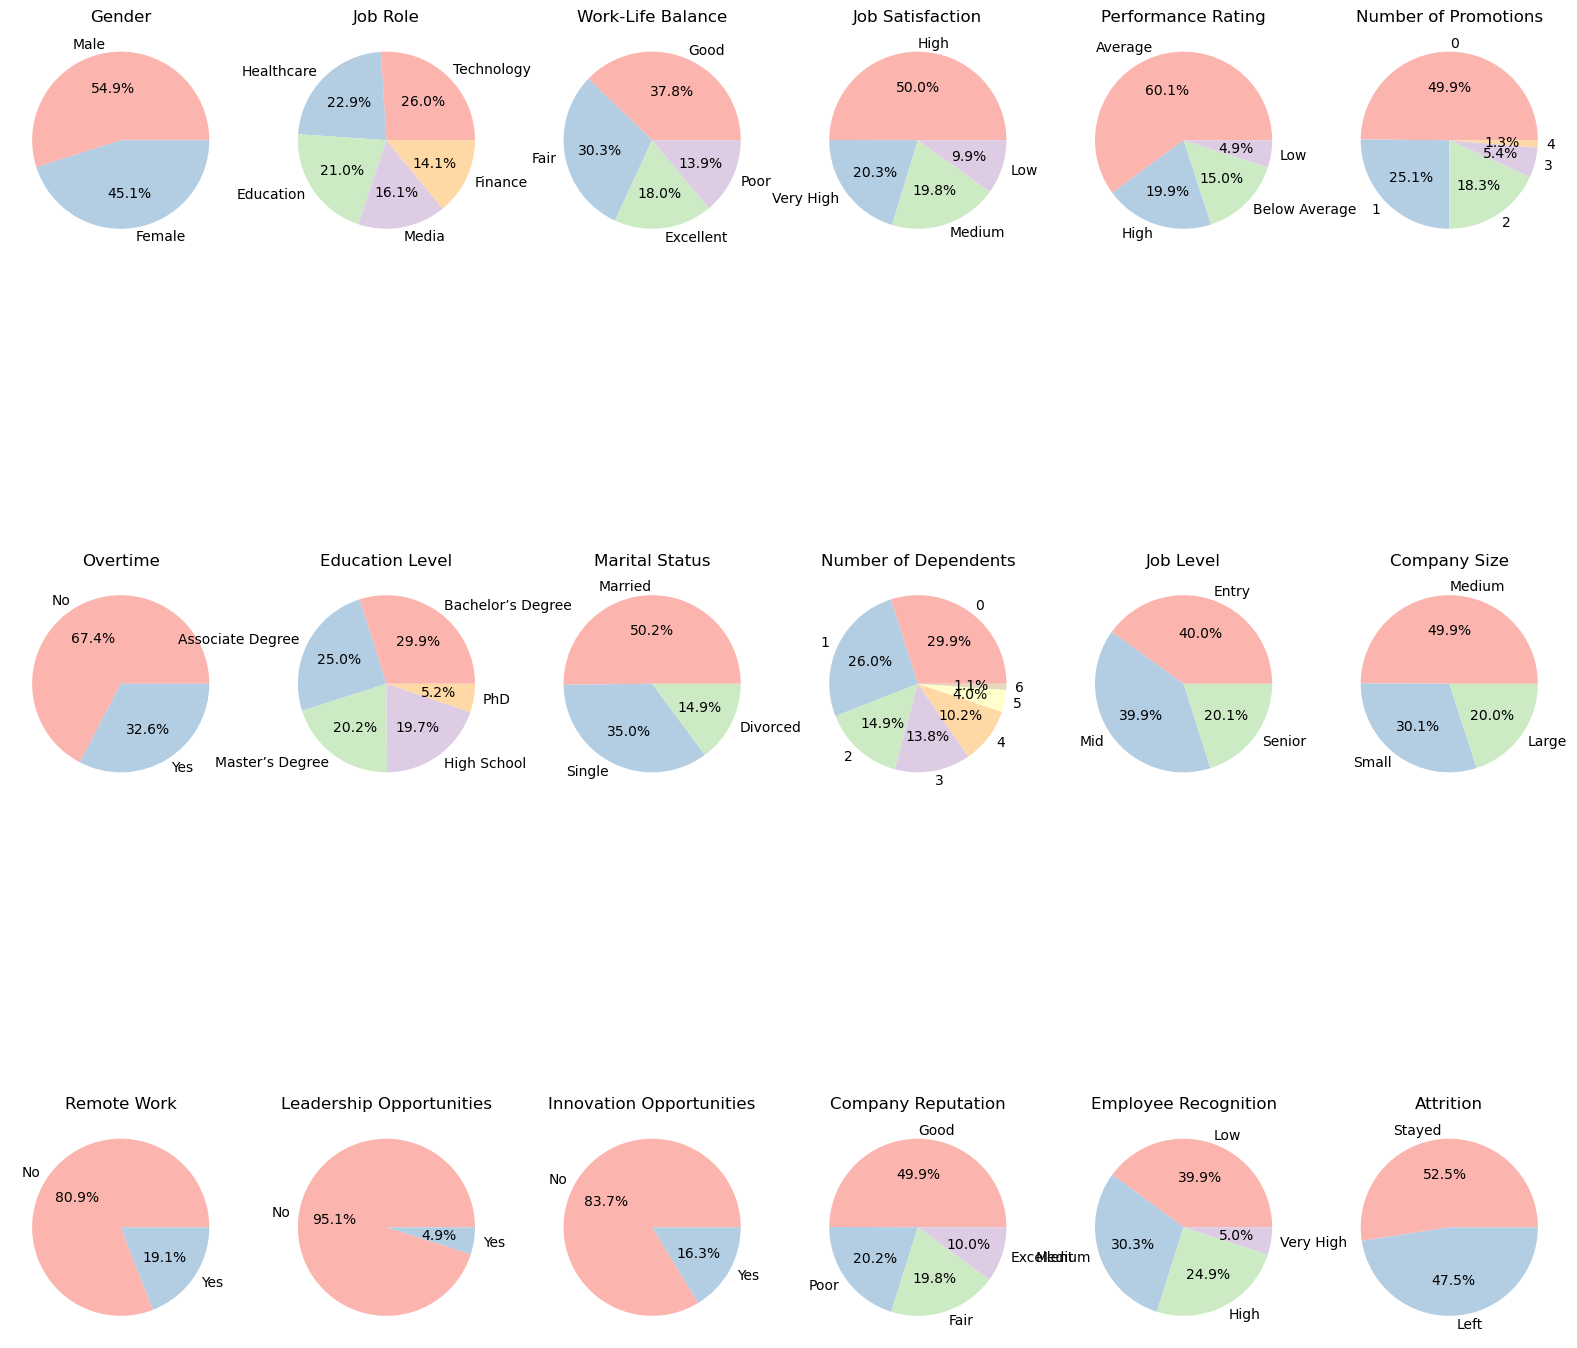

In [638]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the number of rows and columns for subplots (for example, 3 columns, adjust rows as needed)
n_rows = 3  # You can adjust this value depending on the number of columns and layout preference
n_cols = (len(categorical_columns) + n_rows - 1) // n_rows  # Calculate the number of rows dynamically

# Create subplots with multiple rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Flatten axes in case there are more than 1 row and column
axes = axes.flatten()

# Set the color palette
palette = sns.color_palette("Pastel1")

# Loop over each categorical column and corresponding axis
for ax, col in zip(axes, categorical_columns):
    # Calculate value counts
    counts = df[col].value_counts()

    # Plot the pie chart with appropriate labels
    ax.pie(counts, labels=counts.index, autopct="%1.1f%%", colors=palette)
    ax.set_title(col)



In [639]:
for col in categorical_columns:
    print(df[col].value_counts())

Gender
Male      32739
Female    26859
Name: count, dtype: int64
Job Role
Technology    15507
Healthcare    13642
Education     12490
Media          9574
Finance        8385
Name: count, dtype: int64
Work-Life Balance
Good         22528
Fair         18046
Excellent    10719
Poor          8305
Name: count, dtype: int64
Job Satisfaction
High         29779
Very High    12111
Medium       11817
Low           5891
Name: count, dtype: int64
Performance Rating
Average          35810
High             11888
Below Average     8950
Low               2950
Name: count, dtype: int64
Number of Promotions
0    29716
1    14965
2    10884
3     3245
4      788
Name: count, dtype: int64
Overtime
No     40148
Yes    19450
Name: count, dtype: int64
Education Level
Bachelor’s Degree    17826
Associate Degree     14915
Master’s Degree      12020
High School          11748
PhD                   3089
Name: count, dtype: int64
Marital Status
Married     29908
Single      20835
Divorced     8855
Name: count, dt

# **Visualizing Relationships Between Variables**

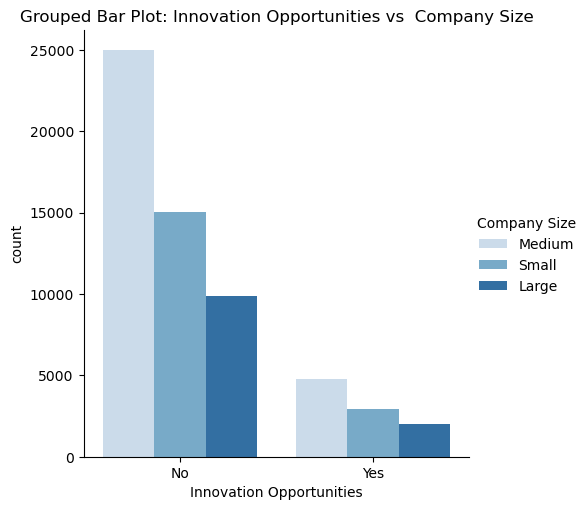

In [641]:
sns.catplot(x='Innovation Opportunities', hue='Company Size', kind='count', data=df,palette='Blues')
plt.title('Grouped Bar Plot: Innovation Opportunities vs  Company Size')
plt.show()


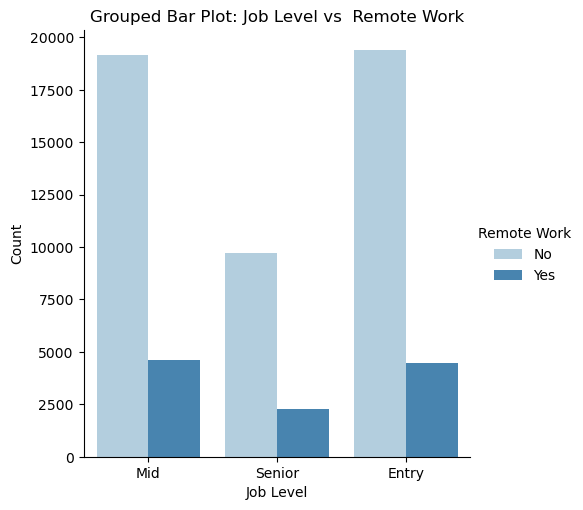

In [642]:
sns.catplot(x='Job Level', hue='Remote Work', kind='count', data=df,palette='Blues')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.title('Grouped Bar Plot: Job Level vs  Remote Work')
plt.show()

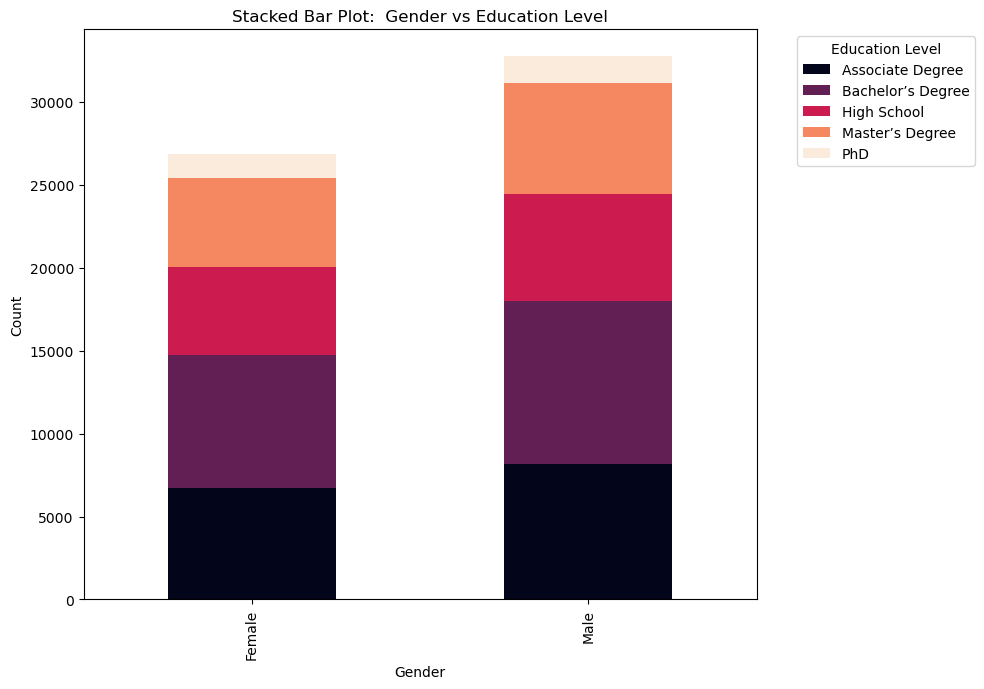

In [643]:
crosstab = pd.crosstab(df['Gender'], df['Education Level'])
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the stacked bars
crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='rocket')  # Change colormap if desired

# Add labels, title, and legend
ax.set_title('Stacked Bar Plot:  Gender vs Education Level')
ax.set_ylabel('Count')
ax.set_xlabel('Gender')

# Display legend outside the plot
ax.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


# **Scaling Numerical Features and Encoding Categorical Features**

In [645]:
df.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [647]:

  # Remove inplace=True here

# Apply one-hot encoding with drop_first=True
for col in categorical_columns:
    df= pd.concat([df, pd.get_dummies(df[col], prefix=col, drop_first=True)], axis=1)
    df.drop(col, axis=1, inplace=True)


In [649]:
for col in numerical_columns:
    scaler=MinMaxScaler()
    df[col]=scaler.fit_transform(df[[col]])

In [651]:
df.head()

,Age,Years at Company,Monthly Income,Distance from Home,Company Tenure,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,...,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High,Attrition_Stayed
0,0.317073,0.36,0.274658,0.214286,0.690476,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,1.000000,0.06,0.284366,0.204082,0.150794,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,True
2,0.146341,0.18,0.461336,0.102041,0.571429,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,True
3,0.439024,0.12,0.180206,0.265306,0.380952,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,True
4,0.926829,0.80,0.236297,0.714286,0.523810,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True


# **Artificial Neural Network (ANN): Architecture, Training, and Results**

In [656]:
X = df.drop('Attrition_Stayed', axis=1)
y = df['Attrition_Stayed']

In [658]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [660]:
X_train.shape[1]

49

In [662]:
model=Sequential()
model.add(Dense(128,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [664]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [666]:
result=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))


Epoch 1/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7230 - loss: 0.5246 - val_accuracy: 0.7430 - val_loss: 0.4978
Epoch 2/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7540 - loss: 0.4789 - val_accuracy: 0.7500 - val_loss: 0.4824
Epoch 3/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7573 - loss: 0.4683 - val_accuracy: 0.7494 - val_loss: 0.4792
Epoch 4/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7598 - loss: 0.4667 - val_accuracy: 0.7512 - val_loss: 0.4809
Epoch 5/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7639 - loss: 0.4570 - val_accuracy: 0.7491 - val_loss: 0.4862
Epoch 6/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7610 - loss: 0.4573 - val_accuracy: 0.7471 - val_loss: 0.4830
Epoch 7/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7626 - loss: 0.4546 - val_accuracy: 0.7473 - val_loss: 0.4912
Epoch 8/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7703 - loss: 0.4462 - 

In [667]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print(f'Test Loss: {test_loss}, Test accuracy: {test_accuracy}')


373/373 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.7402 - loss: 0.5094
Test Loss: 0.5045280456542969, Test accuracy: 0.7427013516426086


In [668]:
result.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

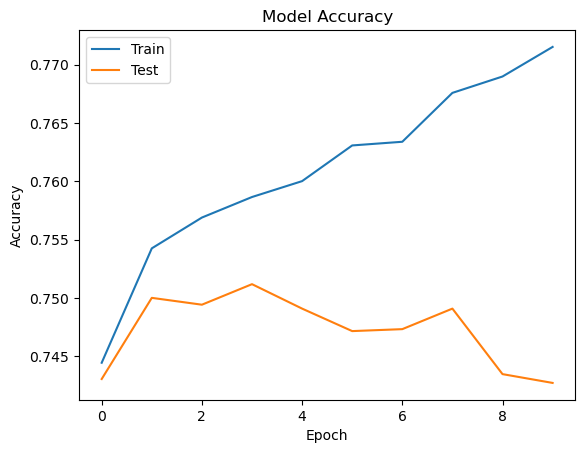

In [669]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [670]:
def build_model1(hp):
  num_of_hidden_layers=hp.Int('num_of_hidden_layers',1,20)
  learning_rate=hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4,1e-5])
  optimizers=hp.Choice('optimizers',values=['adam','rmsprop','sgd'])
  model=Sequential()
  model.add(Flatten(input_shape=((49,))))


  for i in range(num_of_hidden_layers):
      model.add(Dense(hp.Int("layer "+str(i),10,300,20),activation='relu'))
      model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,.4,.5])))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=optimizers,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [671]:
tuner=kt.RandomSearch(build_model1,objective='val_accuracy',max_trials=15,directory='output',project_name='output')

Reloading Tuner from output\output\tuner0.json


In [672]:
tuner.search(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))

In [673]:
# Save the model in .h5 format (for example)
#loaded_model.save('model.h5')
bestmodel=tuner.get_best_models()[0]
# Save the best model
import pickle
pickle.dump(bestmodel,open('rf.pkl','wb'))




C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [674]:
tuner.get_best_hyperparameters()[0].values

{'num_of_hidden_layers': 10,
 'learning_rate': 0.0001,
 'optimizers': 'rmsprop',
 'layer 0': 110,
 'dropout0': 0.5,
 'layer 1': 290,
 'dropout1': 0.1,
 'layer 2': 130,
 'dropout2': 0.3,
 'layer 3': 10,
 'dropout3': 0.1,
 'layer 4': 270,
 'dropout4': 0.4,
 'layer 5': 190,
 'dropout5': 0.2,
 'layer 6': 90,
 'dropout6': 0.5,
 'layer 7': 70,
 'dropout7': 0.4,
 'layer 8': 270,
 'dropout8': 0.2,
 'layer 9': 30,
 'dropout9': 0.2,
 'layer 10': 250,
 'dropout10': 0.3,
 'layer 11': 210,
 'dropout11': 0.4,
 'layer 12': 30,
 'dropout12': 0.2,
 'layer 13': 30,
 'dropout13': 0.1,
 'layer 14': 110,
 'dropout14': 0.3,
 'layer 15': 210,
 'dropout15': 0.4,
 'layer 16': 70,
 'dropout16': 0.2,
 'layer 17': 190,
 'dropout17': 0.1,
 'layer 18': 270,
 'dropout18': 0.5}

In [675]:
test_loss,test_acc=bestmodel.evaluate(X_test,y_test)
print(test_acc)

373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7511 - loss: 0.5117
0.7546979784965515


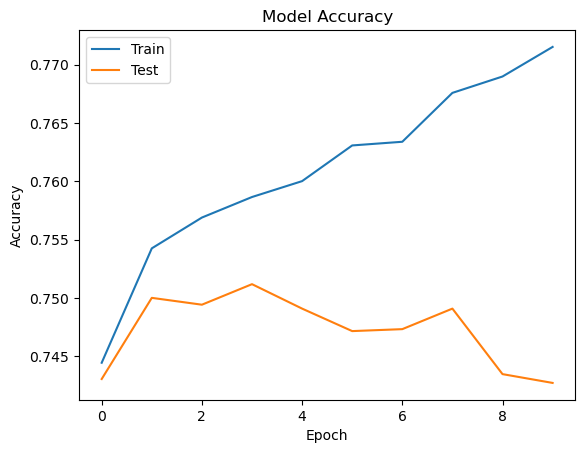

In [676]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

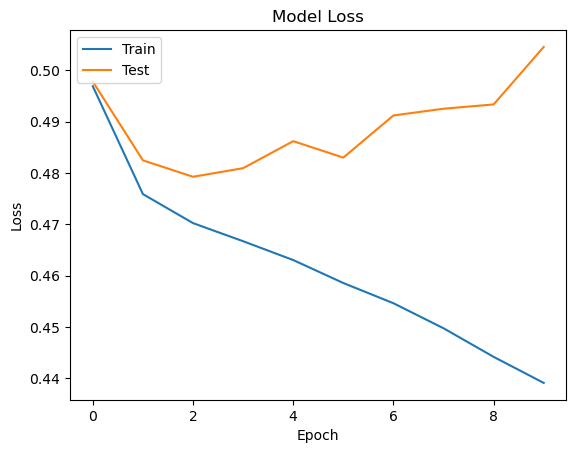

In [677]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [678]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

373/373 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step


In [679]:
print(classification_report(y_test, y_pred_binary))


              precision    recall  f1-score   support

       False       0.71      0.77      0.74      5667
        True       0.78      0.72      0.74      6253

    accuracy                           0.74     11920
   macro avg       0.74      0.74      0.74     11920
weighted avg       0.75      0.74      0.74     11920



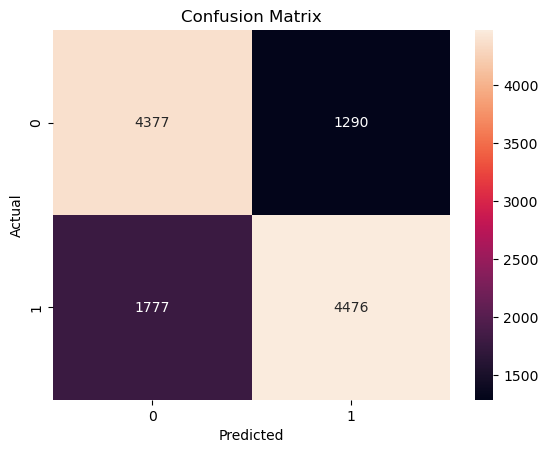

In [680]:
cm=confusion_matrix(y_test,y_pred_binary)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

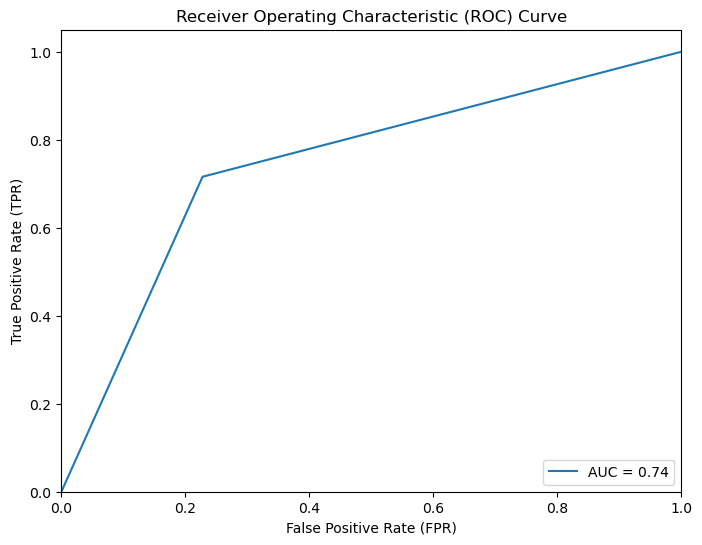

In [681]:

# Assuming y_test are your true labels and y_pred_proba are predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_binary):.2f}')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [682]:
# Save the model using Keras (choose .h5 or SavedModel format)
best_model = tuner.get_best_models(num_models=1)[0]
best_model.save('best_model2.h5')  # HDF5 format
# OR, to save in the SavedModel format:
# best_model.save('best_model')


C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
